# Final Project, Part 2
## This report combined several notebooks together, and the final visualization is at the end of the notebooks as well as the final write-up.

## Group 2 members:
### Ruixin Han, Shivani Dhavala, Trishla Nair, Wesley Au

In [128]:
import bqplot
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
from pathlib import Path
print(Path.cwd())

C:\Users\Trish\Documents\IS445\Assignments\Final_Project\part_2


In [130]:
import altair as alt
from vega_datasets import data

### Manipulation of the dataset
When I first tried to open the CSV file, I got an error saying 'ParserError: Error tokenizing data. C error: Expected 39 fields in line 138, saw 40'. Then, I tried to trace the error by looking up in google and added "on_bad_lines='skip'" after the path of the file.
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

In [131]:
storm = pd.read_csv("storm.csv", on_bad_lines='skip')
storm

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,5139144,MACOUPIN CO.,SHIPMAN,04/20/2000,659,Tornado,,F1,0,0,...,SHIPMAN,04/20/2000,659,39.13333,-90.05,39.13333,-90.05,A small tornado (low end of F1) struck briefly...,NaN,1
1,5141865,LOGAN CO.,LINCOLN,04/20/2000,800,Tornado,,F0,0,0,...,LINCOLN,04/20/2000,800,40.11667,-89.41667,40.11667,-89.41667,A tornado touched down briefly in a field 4 mi...,NaN,2
2,5141481,SANGAMON CO.,ILLIOPOLIS,04/20/2000,805,Tornado,,F0,0,0,...,ILLIOPOLIS,04/20/2000,805,40.4,-89.41667,40.4,-89.41667,A tornado briefly touched down one mile south ...,NaN,3
3,5141936,MACON CO.,OREANA,04/20/2000,830,Tornado,,F1,0,0,...,OREANA,04/20/2000,840,39.95,-88.85,39.98333,-88.81667,The tornado touched down 1.8 miles northeast o...,NaN,4
4,5141869,MACON CO.,FORSYTH,04/20/2000,830,Tornado,,F1,0,0,...,FORSYTH,04/20/2000,831,39.95,-88.95,39.95,-88.95,The tornado touched down west northwest of the...,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,5521739,PIATT CO.,CISCO,07/26/2006,1810,Tornado,,F0,0,0,...,CISCO,07/26/2006,1811,40,-88.76667,39.98333,-88.75,A tornado briefly touched down in a field caus...,NaN,496
493,5521740,VERMILION CO.,ROSSVILLE,07/26/2006,1815,Tornado,,F1,0,0,...,ROSSVILLE,07/26/2006,1823,40.38333,-87.7,40.41667,-87.66667,A tornado touched down 2 miles west of Rossvil...,NaN,497
494,5521741,PIATT CO.,CISCO,07/26/2006,1822,Tornado,,F0,0,0,...,CISCO,07/26/2006,1822,40.01667,-88.68333,40.01667,-88.68333,A tornado briefly touched down in a field and ...,NaN,498
495,5521742,PIATT CO.,CISCO,07/26/2006,1825,Tornado,,F0,0,0,...,CISCO,07/26/2006,1825,40.01667,-88.65,40.01667,-88.65,A tornado briefly touched down in a field and ...,NaN,499


In [132]:
storm.BEGIN_LAT.sort_values()

310            
153            
152            
155            
154            
         ...   
240    42.21667
244    42.21667
79        42.45
203       42.45
202    42.48333
Name: BEGIN_LAT, Length: 497, dtype: object

In [133]:
storm.BEGIN_LON.max()

'-91.5'

In [134]:
storm.BEGIN_LON.describe()

count           497
unique          182
top       -89.36667
freq             12
Name: BEGIN_LON, dtype: object

In [135]:
storm['BEGIN_LAT'].dropna()

0      39.13333
1      40.11667
2          40.4
3         39.95
4         39.95
         ...   
492          40
493    40.38333
494    40.01667
495    40.01667
496    40.46667
Name: BEGIN_LAT, Length: 497, dtype: object

In [136]:
storm['BEGIN_LAT'].replace(' ', np.nan, inplace=True)

In [137]:
storm['BEGIN_LAT'].dropna(inplace=True)

**Problem**
The following is the printed out result from the cell above. Since there are 5 data points being dropped and now the length of the 'BEGIN_LAT' series is 492, I expect to see the updated series to be changed. However, the result of the next cell ends up being the same.
```
0      39.13333
1      40.11667
2          40.4
3         39.95
4         39.95
         ...   
492          40
493    40.38333
494    40.01667
495    40.01667
496    40.46667
Name: BEGIN_LAT, Length: 492, dtype: object
```

In [138]:
storm['BEGIN_LAT']

0      39.13333
1      40.11667
2          40.4
3         39.95
4         39.95
         ...   
492          40
493    40.38333
494    40.01667
495    40.01667
496    40.46667
Name: BEGIN_LAT, Length: 497, dtype: object

**Use projection in vege Lite to map the longitude and latitude value from csv file** https://vega.github.io/vega-lite/docs/projection.html

In [139]:
brush = alt.selection_interval(encodings=['x','y'])

In [140]:
chart3 = alt.Chart.from_dict({
  "width": 500,
  "height": 300,
  "data": {"url": "https://raw.githubusercontent.com/hanlily666/hanlily666.github.io/main/storm.csv"},
    "selection": {
    "grid": {
      "type": "interval", "bind": "scales"
    }   # zooming and panning by adding "grid"
  },
  "projection": {
    "type": "albersUsa"
  },
  "mark": "circle",
  "encoding": {
    "x": {
      "field": "BEGIN_LON",
#         "aggregate":"count", tried to make a heatmap from the count
      "type": "quantitative",
        "scale": {
            "type": "linear",
            "domain": [-95, -85]
    },  # set the range of the axies https://vega.github.io/vega-lite/docs/scale.html#config 
    },
    "y": {
      "field": "BEGIN_LAT",
#     "aggregate":"count",
      "type": "quantitative",
        "scale": {
            "type": "linear",
            "domain": [35, 45]
    },
    },
    "size": {"value": 10},
    "tooltip": [
      {"field": "BEGIN_LOCATION", "type": "nominal", "title": "Tornado Begin Location"}
    ]
  }
}).add_selection(
    brush
)

chart3

alt.Chart(...)

In [141]:
chart4 = alt.Chart.from_dict({
  "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
  "mark":"bar",
  "encoding":{
    "x":{"field":"TOR_F_SCALE", "type":"nominal", "title":"Tornado Scale"},
    "y":{
      "aggregate":"count", # for each x-bin (i.e. bin in Mobility score), count # of entries in dataset
      "type":"quantitative",
      "axis":{"title":"Histogram"}
    } # end y-specific encoding
  } # end encoding
}).transform_filter(
    brush
)

chart4

alt.Chart(...)

In [142]:
chartFirst = chart3 | chart4
chartFirst

alt.HConcatChart(...)

In [143]:
brush = alt.selection_interval(encodings=['x','y'])

In [144]:
chart7 = alt.Chart.from_dict({
  "data":{"url":"https://raw.githubusercontent.com/hanlily666/hanlily666.github.io/main/storm.csv"},
  "mark":"rect", # equivalent to grid heat map
  #"height":"400",
  "height":400,
  "encoding":{
    "x":{"field":"BEGIN_LOCATION", "type":"nominal"},
    "y":{"field":"TOR_F_SCALE", "type":"nominal"}, 
    "color":{"aggregate":"count", "type":"quantitative"} # counting the # of each STR & State combo
  } # end encoding
}).add_selection(
    brush
)
chart7

alt.Chart(...)

In [145]:
chart1 = alt.Chart.from_dict({
    "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
    "mark":"circle",
    "height":400,
    "encoding":{
    "x":{"field":"TOR_LENGTH", "type":"quantitative"},
    "y":{"field":"TOR_WIDTH", "type":"quantitative"}}}).transform_filter(
    brush
)


chart1

alt.Chart(...)

In [146]:
chart10 = chart7 | chart1
chart10

alt.HConcatChart(...)

In [147]:
chart4 = alt.Chart.from_dict({
  "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
  "mark":"bar",
  "encoding":{
    "x":{"field":"TOR_F_SCALE", "type":"quantitative", "title":"Tornado Scale"},
    "y":{
      "aggregate":"count", # for each x-bin (i.e. bin in Mobility score), count # of entries in dataset
      "type":"quantitative",
      "axis":{"title":"Histogram"}
    } # end y-specific encoding
  } # end encoding
}).transform_filter(
    brush
)

chart4

alt.Chart(...)

In [148]:
chart5 = chart7 | chart4
chart5

alt.HConcatChart(...)

In [149]:
brush = alt.selection_interval(encodings=['x','y'])

In [150]:
# interval = alt.selection_interval()
chart1 = alt.Chart.from_dict({
    "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
    "mark":"circle",
    "height":400,
    "encoding":{
    "x":{"field":"TOR_LENGTH", "type":"quantitative"},
    "y":{"field":"TOR_WIDTH", "type":"quantitative"}}})

chart1

alt.Chart(...)

In [151]:
chart6 = alt.HConcatChart(hconcat=[chart1,chart4])
chart6

alt.HConcatChart(...)

In [152]:
slider = alt.binding_range(min=0, max=1, step=0.05, name='opacity:')
# op_var = alt.param(value=0.1, bind=slider)

chart1 = alt.Chart.from_dict({
  #// Data
  "data": {"url":"https://raw.githubusercontent.com/hanlily666/hanlily666.github.io/main/storm.csv"},
  #// Marks
  "mark":"rect", 
# equivalent to grid heat map
  "height":400,
  #// Encoding (note:error for encoding vs encodings)
  "encoding":{
    #//"x":{"field":"Student_teacher_ratio", "type":"quantitative"},
    "x":{"field":"BEGIN_LAT", "type":"quantitative"},
    "y":{"field":"BEGIN_LON","type":"quantitative"},
    "color":{"aggregate":"count", "type":"quantitative"} 
    #// will show the number of records with a specific student/teacher ratio in a particular state
  }
  
})
# .add_params(
#     op_var
# ) 

chart1

alt.Chart(...)

In [153]:
chart2 = alt.Chart.from_dict({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "config": {"view": {"continuousWidth": 400, "continuousHeight": 300}},
  "data": {
    "url": "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson",
    "format": {"property": "features"}
  },
  "mark": "geoshape",
  "encoding": {
    "shape":{"type":"geojson"},
#     "tooltip": [
#       {"field": "properties.coordinates", "type": "MultiPolygon", "title": "Coordinates"}
#     ]
  },
  "height": 300,
  "width": 500
})
chart2
# slider = alt.binding_range(min=0, max=1, step=0.05, name='opacity:')
# # op_var = alt.param(value=0.1, bind=slider)

# chart1 = alt.Chart.from_dict({
#   #// Data
#   "data": {"url":"https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson"},
#   #// Marks
#   "mark":"rect", 
# # equivalent to grid heat map
#   "height":400,
#   #// Encoding (note:error for encoding vs encodings)
#   "encoding":{
#     #//"x":{"field":"Student_teacher_ratio", "type":"quantitative"},
#     "x":{"field":"BEGIN_LAT", "type":"quantitative"},
#     "y":{"field":"BEGIN_LON","type":"quantitative"},
#     "color":{"aggregate":"count", "type":"quantitative"} 
#     #// will show the number of records with a specific student/teacher ratio in a particular state
#   }
  
# })
# # .add_params(
# #     op_var
# # ) 

# chart1

alt.Chart(...)

In [154]:
storm[['BEGIN_LOCATION','END_LOCATION','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']]

,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,SHIPMAN,SHIPMAN,39.13333,-90.05,39.13333,-90.05
1,LINCOLN,LINCOLN,40.11667,-89.41667,40.11667,-89.41667
2,ILLIOPOLIS,ILLIOPOLIS,40.4,-89.41667,40.4,-89.41667
3,OREANA,OREANA,39.95,-88.85,39.98333,-88.81667
4,FORSYTH,FORSYTH,39.95,-88.95,39.95,-88.95
...,...,...,...,...,...,...
492,CISCO,CISCO,40,-88.76667,39.98333,-88.75
493,ROSSVILLE,ROSSVILLE,40.38333,-87.7,40.41667,-87.66667
494,CISCO,CISCO,40.01667,-88.68333,40.01667,-88.68333
495,CISCO,CISCO,40.01667,-88.65,40.01667,-88.65


In [155]:
il = geopandas.read_file('https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson')

### Originality of the Data
We found this dataset through the open source dataset for the map of IL. Since we are trying to map out the storm data  through data visualization, this dataset basically is a geojson file of the map.

In [156]:
il.head()

,name,co_fips,cartodb_id,created_at,updated_at,geometry
0,Greene,61,1,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-90.30195 39.52063, -90.28319 ..."
1,Clinton,27,2,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-89.59725 38.74320, -89.57489 ..."
2,Tazewell,179,11,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-89.26932 40.59450, -89.26917 ..."
3,Fulton,57,12,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-89.98606 40.71224, -89.98652 ..."
4,Adams,1,13,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-91.50534 40.20028, -91.49183 ..."


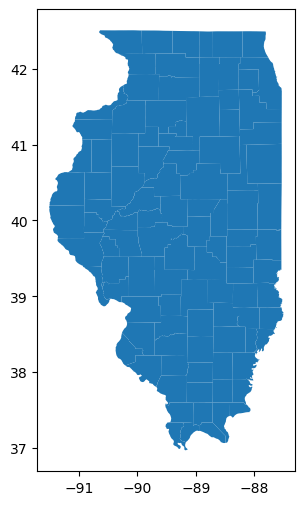

In [157]:
fig, ax = plt.subplots(figsize=(6,6))
il.plot(ax=ax)
plt.show()

In [158]:
import contextily as ctx

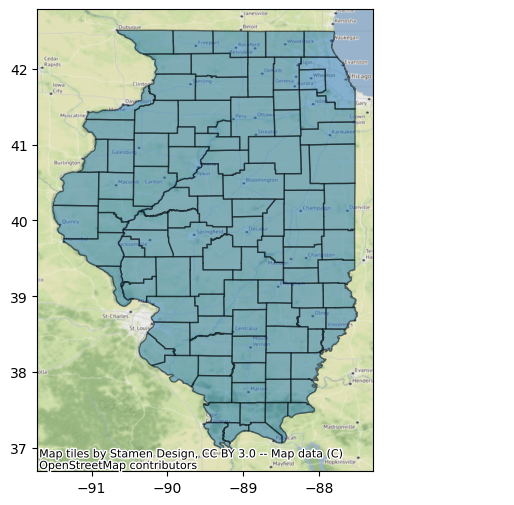

In [159]:
fig, ax = plt.subplots(figsize=(6,6))
il.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=il.crs)
# The code is referenced from the Professor Naiman's in-class notes, and I comment out these two lines to edit later.
# These are the parameters of the iSchool location.
# ax.set_xlim(-88.245, -88.225)
# ax.set_ylim(40.10, 40.125) 
plt.show()

### Merged notebook

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import altair as alt
import numpy as np
import bqplot

In [161]:
df = pd.read_csv('altered_storm_data_T.csv')
df

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,5139144,MACOUPIN CO.,SHIPMAN,4/20/2000,659,Tornado,,1,0,0,...,SHIPMAN,4/20/2000,659,39.13333,-90.05000,39.13333,-90.05000,A small tornado (low end of F1) struck briefly...,NaN,1
1,5141865,LOGAN CO.,LINCOLN,4/20/2000,800,Tornado,,0,0,0,...,LINCOLN,4/20/2000,800,40.11667,-89.41667,40.11667,-89.41667,A tornado touched down briefly in a field 4 mi...,NaN,2
2,5141481,SANGAMON CO.,ILLIOPOLIS,4/20/2000,805,Tornado,,0,0,0,...,ILLIOPOLIS,4/20/2000,805,40.40000,-89.41667,40.40000,-89.41667,A tornado briefly touched down one mile south ...,NaN,3
3,5141936,MACON CO.,OREANA,4/20/2000,830,Tornado,,1,0,0,...,OREANA,4/20/2000,840,39.95000,-88.85000,39.98333,-88.81667,The tornado touched down 1.8 miles northeast o...,NaN,4
4,5141869,MACON CO.,FORSYTH,4/20/2000,830,Tornado,,1,0,0,...,FORSYTH,4/20/2000,831,39.95000,-88.95000,39.95000,-88.95000,The tornado touched down west northwest of the...,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5521739,PIATT CO.,CISCO,7/26/2006,1810,Tornado,,0,0,0,...,CISCO,7/26/2006,1811,40.00000,-88.76667,39.98333,-88.75000,A tornado briefly touched down in a field caus...,NaN,496
496,5521740,VERMILION CO.,ROSSVILLE,7/26/2006,1815,Tornado,,1,0,0,...,ROSSVILLE,7/26/2006,1823,40.38333,-87.70000,40.41667,-87.66667,A tornado touched down 2 miles west of Rossvil...,NaN,497
497,5521741,PIATT CO.,CISCO,7/26/2006,1822,Tornado,,0,0,0,...,CISCO,7/26/2006,1822,40.01667,-88.68333,40.01667,-88.68333,A tornado briefly touched down in a field and ...,NaN,498
498,5521742,PIATT CO.,CISCO,7/26/2006,1825,Tornado,,0,0,0,...,CISCO,7/26/2006,1825,40.01667,-88.65000,40.01667,-88.65000,A tornado briefly touched down in a field and ...,NaN,499


In [162]:
alt.Chart(df).mark_bar().encode(
    x='TOR_LENGTH',
    y='TOR_WIDTH',
)

alt.Chart(...)

In [163]:
alt.Chart(df).mark_point().encode(
    x='TOR_LENGTH',
    y='TOR_WIDTH',
).interactive()

alt.Chart(...)

In [164]:
alt.Chart(df).mark_bar().encode(
    x='TOR_F_SCALE',
    y = 'count()'
)

alt.Chart(...)

In [167]:
# interval = alt.selection_interval()

# scatter = alt.Chart(df).mark_point().encode(
#     x='TOR_LENGTH',
#     y='TOR_WIDTH',
#     color = 'BEGIN_LOCATION'
#     #color = alt.condition(interval,'BEGIN_LOCATION:N', alt.value('lightgray'))).add_selection(interval)

# hist = alt.Chart(df).mark_bar().encode(
#     x='TOR_F_SCALE',
#     y='count()',
#     color='TOR_F_SCALE'
# ).transform_filter(
#     interval
# )

# hist | scatter

In [168]:
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(df).mark_point().encode(
    x='TOR_LENGTH',
    y='TOR_WIDTH',
    color = 'TOR_F_SCALE:N'
).transform_filter(
    click
)

hist = alt.Chart(df).mark_bar().encode(
    x='TOR_F_SCALE',
    y='count()',
    color=alt.condition(click, 'TOR_F_SCALE:N', alt.value('lightgray'))
).add_selection(
    click
)

hist | scatter

alt.HConcatChart(...)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import altair as alt
import numpy as np
import bqplot

In [ ]:
# df = pd.read_csv('tornados_recent.csv')
# df

In [ ]:
df = pd.read_csv('altered_storm_data_T.csv')
#df.dtypes
df.dtypes

In [ ]:
# interval = alt.selection_interval()
# chart1 = alt.Chart.from_dict({
#   "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
#     "transform": [{
#     "pivot": "TOR_FSCALE",
#     "value": "max",
#     "groupby": ["BEGIN_LAT"]}],
#   "mark":"rect",
#   "height":400,
#   "encoding":{
#       "x":{"field":"BEGIN_LAT", "type":"quantitative"},
#     #"x":{"field":"BEGIN_LAT", "type":"nomial"},
#       #"longitude": {"field": "BEGIN_LON","type": "quantitative"},
#       "y":{"field":"BEGIN_LONG", "type":"quantitative"}, 
#       #"y":{"field":"BEGIN_LONG", "type":"nomial"}, 
#       #"latitude": {"field": "BEGIN_LAT", "type": "quantitative"},
#       "color":{"aggregate":"count", "type":"quantitative", "scale": {"scheme": "goldred"}}
#   }
# }).add_selection(
#     interval
# )
# chart1

In [ ]:
table1 = pd.pivot_table(df, values= 'TOR_F_SCALE', index= 'BEGIN_LAT' , columns= 'BEGIN_LON', aggfunc=np.max, fill_value = 0)
table1

In [ ]:
col_sc = bqplot.ColorScale(scheme='Blues')# <3
x_sc = bqplot.OrdinalScale() # ordered bins
y_sc = bqplot.OrdinalScale()

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, label='Mean', orientation='vertical',
                         side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'BEGIN_LAT', tick_rotate=45, tick_style = {'font-size': '6px', 'text-anchor': 'start'}, 
                   label_offset = '55px')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label = 'BEGIN_LONG', tick_style = {'font-size': '6px'}, label_offset = '50px')

# 4. Mark - heatmap
heat_map = bqplot.GridHeatMap(color=table1, 
                              row=table1.index.values.astype('str'),
                              column=table1.columns.values.astype('str'),
                              scales={'color':col_sc,
                                                 'row':y_sc,
                                                 'column':x_sc},
                             interactions={'click':'select'},
                             selected_style={'fill':'blue'})

# 5. interactions

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig

def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        lat=table.index.values.astype('str')[i]
        long=table.columns.values.astype('str')[j]
        region_mask = ( (df['BEGIN_LAT']==lat) &\
              (df['BEGIN_LONG']==long))
        data=license.loc[region_mask]
        data_y=data.groupby('Original Issue Year')['days between Original Issue Date and Expiration Date'].median()
        bar.x = data['Original Issue Year']
        bar.y = data_y

        
        
heat_map.observe(get_data_value, 'selected')

In [ ]:
interval = alt.selection_interval()
chart1 = alt.Chart.from_dict({
    "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
    "transform": [{
    "pivot": "TOR_FSCALE",
    "value": "max",
    "groupby": ["TOR_LENGTH"]}],
  "mark":"circle",
  "height":400,
  "encoding":{
    "x":{"field":"TOR_LENGTH", "type":"nominal"},
    "y":{"field":"TOR_WIDTH", "type":"nominal"}, 
      "color":{"aggregate":"count", "type":"quantitative", "scale": {"scheme": "goldred"}}}}).add_selection(interval)
chart1

In [ ]:
interval = alt.selection_interval()
chart1 = alt.Chart.from_dict({
    "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
    "transform": [{"pivot": "TOR_F_SCALE", "value": "TOR_WIDTH", "groupby": ["TOR_LENGTH", "TOR_WIDTH"]}],
    "mark":"circle",
    "height":400,
    "encoding":{
    "x":{"field":"TOR_LENGTH", "type":"quantitative"},
    "y":{"field":"TOR_WIDTH", "type":"quantitative"},
    "color":{"aggregate":"count", "type":"quantitative", "scale": {"scheme": "goldred"}}}}).add_selection(interval)
chart1

In [ ]:
interval = alt.selection_interval()
#point = alt.selection_point()
chart1 = alt.Chart.from_dict({
    "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
    "mark":"circle",
    "height":400,
    "encoding":{
    "x":{"field":"TOR_LENGTH", "type":"quantitative"},
    "y":{"field":"TOR_WIDTH", "type":"quantitative"}}}).add_selection(interval)
chart1

In [ ]:
chart4 = alt.Chart.from_dict({
  "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
  "mark":"bar",
  "encoding":{
    "x":{"field":"TOR_F_SCALE", "type":"nominal", "title":"Tornado Scale"},
    "y":{
      "aggregate":"count", # for each x-bin (i.e. bin in Mobility score), count # of entries in dataset
      "type":"quantitative",
      "axis":{"title":"Frequency"}
    } # end y-specific encoding
  } # end encoding
})
chart4

In [ ]:
chart6 = alt.hconcat(chart1, chart4)
chart6

In [ ]:
# brush = alt.selection_interval(encodings=['x'])
# alt.Chart(chart6).mark_point().encode(
#     x='TOR_LENGTH:TOR_F_SCALE',
#     y='TOR_WIDTH:TOR_F_SCALE',
#     color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))).properties(width=250,height=250)

# chart6 | chart6.encode(x='Acceleration:Q')

In [ ]:
# click = alt.selection_multi(encodings=['color'])

# scatter = alt.Chart.from_dict({
#     "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
#     "mark":"circle",
#     "height":400,
#     "encoding":{
#     "x":{"field":"TOR_LENGTH", "type":"quantitative"},
#     "y":{"field":"TOR_WIDTH", "type":"quantitative"}}})

# scatter = alt.Chart(scatter).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N').transform_filter(click)



# chart4 = alt.Chart.from_dict({
#   "data":{"url":"https://raw.githubusercontent.com/tanair2/Storm-repo/main/storm_data_search_results.csv"},
#   "mark":"bar",
#   "encoding":{
#     "x":{"field":"TOR_F_SCALE", "type":"nominal", "title":"Tornado Scale"},
#     "y":{
#       "aggregate":"count", # for each x-bin (i.e. bin in Mobility score), count # of entries in dataset
#       "type":"quantitative",
#       "axis":{"title":"Frequency"}
#     } # end y-specific encoding
#   } # end encoding
# })

# chart4 = chart4.mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N').transform_filter(click)

# scatter | chart4

## Final Chosen Visual:

In [169]:
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(df).mark_point().encode(
    x='TOR_LENGTH',
    y='TOR_WIDTH',
    color = 'TOR_F_SCALE:N'
).transform_filter(
    click
)

hist = alt.Chart(df).mark_bar().encode(
    x='TOR_F_SCALE',
    y='count()',
    color=alt.condition(click, 'TOR_F_SCALE:N', alt.value('lightgray'))
).add_selection(
    click
)

hist | scatter

alt.HConcatChart(...)

## Write-up

The above code creates a scatter plot and a histogram using the Altair library. The scatter plot shows the relationship between the TOR_LENGTH (the length of the tornado) and TOR_WIDTH (the width of the torndao) variables from a dataset, where each point on the scatter plot represents a row of the data. The points on the scatter plot are colored according to the TOR_F_SCALE variable (the scale used to identify the strenght of a tornado's winds), which has been converted to a nominal scale.

Additionally, the scatter plot is filtered based on user interaction using the alt.selection_multi() function, which allows users to select multiple points on the plot by clicking on them. The filtered points are highlighted in the scatter plot and the corresponding bins in the histogram are highlighted as well.

The histogram shows the distribution of the TOR_F_SCALE variable. Each bin on the histogram represents a range of values for the TOR_F_SCALE variable, and the height of each bin represents the count of rows in the data that fall within that range. The histogram is also interactive, and the color of the bars changes based on the selection in the scatter plot.

Note:
The datasets used are the moifyied version of the storm data collected from 2000-2022 by the NOAA. To adress concerns about the data, 2 different modified versions of the data were used with one having unknown latitutde and longitude values were filled s 0 and the F scale is numerical. and the other version where the F-scale is left as an object but lines that were "bad" (as addressed above in the 'Manipulation of Dataset sub heading) were skipped. Additonally the shape of the data was altered so that it could be run. As for the data's size, it is large enough to fit github's requirements (since both versions of the data are uploaded to github under Trishla and Ruixin's own github accounts so as to be used in various attempts to create the visualization).

Data Source: https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=01&beginDate_dd=01&beginDate_yyyy=2000&endDate_mm=12&endDate_dd=31&endDate_yyyy=2022&county=ALL&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=17%2CILLINOIS

### Contextual Datasets

To provide additional context to our primary tornado dataset of Illinois, we opted for two additional tornado datasets of New York and California. These selections were made based on the wealth of contextual information they can provide, allowing us to better illustrate the potential differences in tornado susceptibility between the Midwest region and states on both the east and west coasts. Each of the datasets covers the same date range, facilitating comparisons that will reveal a striking contrast between the three regions.

The California Tornado dataset can be found:
https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=01&beginDate_dd=01&beginDate_yyyy=2000&endDate_mm=12&endDate_dd=31&endDate_yyyy=2022&county=ALL&h…